# Build `DataArray` objects for each mosaic

In [1]:
import tools

In [2]:
! ls $tools.VRT_PATH

2016_B2.vrt  2017_B3.vrt  2018_B4.vrt  2020_B2.vrt  2021_B3.vrt
2016_B3.vrt  2017_B4.vrt  2019_B2.vrt  2020_B3.vrt  2021_B4.vrt
2016_B4.vrt  2018_B2.vrt  2019_B3.vrt  2020_B4.vrt  build_mosaics.ipynb
2017_B2.vrt  2018_B3.vrt  2019_B4.vrt  2021_B2.vrt


## Single year

In [3]:
tools.build_year_mosaic(2016)

<xarray.DataArray (band: 3, y: 122880, x: 66560)>
dask.array<concatenate, shape=(3, 122880, 66560), dtype=float64, chunksize=(1, 4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * band         (band) int64 2 3 4
  * x            (x) float64 5.0 15.0 25.0 ... 6.656e+05 6.656e+05 6.656e+05
  * y            (y) float64 1.229e+06 1.229e+06 1.229e+06 ... 25.0 15.0 5.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## Multi-year

In [4]:
tools.build_multi_year(range(2016, 2022))

<xarray.DataArray (year: 6, band: 3, y: 122880, x: 66560)>
dask.array<concatenate, shape=(6, 3, 122880, 66560), dtype=float64, chunksize=(1, 1, 4096, 4096), chunktype=numpy.ndarray>
Coordinates:
  * year         (year) int64 2016 2017 2018 2019 2020 2021
  * band         (band) int64 2 3 4
  * x            (x) float64 5.0 15.0 25.0 ... 6.656e+05 6.656e+05 6.656e+05
  * y            (y) float64 1.229e+06 1.229e+06 1.229e+06 ... 25.0 15.0 5.0
    spatial_ref  int64 0
Attributes:
    scale_factor:  1.0
    add_offset:    0.0

## Liverpool example

In [5]:
import matplotlib.pyplot as plt

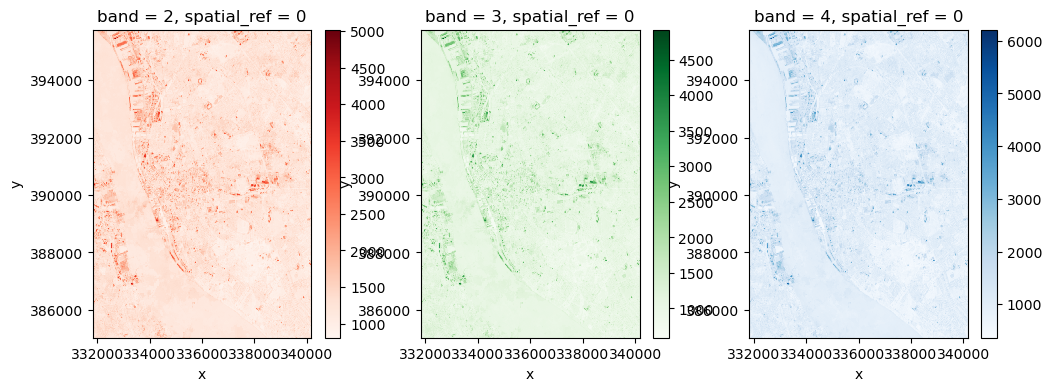

In [6]:
bb = minx, miny, maxx, maxy = 331825, 385032, 340167, 395757

f, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, c, b in zip(axs, ['Reds', 'Greens', 'Blues'], [2, 3, 4]):
    liv = (
        tools.build_year_mosaic(2016)
        .sel(x=slice(minx, maxx), y=slice(maxy, miny))
        .sel(band=b)
    ).compute()
    liv.plot.imshow(cmap=c, ax=ax);